### Using Deep Learning Tools

KIAS CAC Winter School 2020

Dates: 2020-12-16

Author: Yung-Kyun Noh

Department of Computer Science, Hanyang University


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

import matplotlib.pyplot as plt

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_train, y_test)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
[5 0 4 ... 5 6 8] [7 2 1 ... 4 5 6]


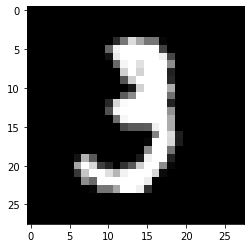

In [3]:
plt.imshow(x_train[10], cmap='gray')


In [4]:
# Vectorization for ANN
x_train_vectorize = x_train.reshape(60000, 784)
x_test_vectorize = x_test.reshape(10000, 784)

import tensorflow.keras as keras
num_categories = 10

y_train_onehot = keras.utils.to_categorical(y_train, num_categories)
y_test_onehot = keras.utils.to_categorical(y_test, num_categories)

print(y_train_onehot, y_test_onehot)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_vectorize, y_train_onehot,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test_vectorize, y_test_onehot))


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0643 - accuracy: 0.8936 - val_loss: 0.4758 - val_accuracy: 0.9113
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5245 - accuracy: 0.9301 - val_loss: 0.4077 - val_accuracy: 0.9460
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4847 - accuracy: 0.9381 - val_loss: 0.4933 - val_accuracy: 0.9422
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4646 - accuracy: 0.9409 - val_loss: 0.4431 - val_accuracy: 0.9392
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4313 - accuracy: 0.9458 - val_loss: 0.7945 - val_accuracy: 0.9332


#### New model with convolution

In [7]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

x_train_forConv = x_train.reshape(60000,28,28,1)
x_test_forConv = x_test.reshape(10000,28,28,1)

history = model.fit(x_train_forConv, y_train_onehot,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test_forConv, y_test_onehot))


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2286 - accuracy: 0.9549 - val_loss: 0.1052 - val_accuracy: 0.9707
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0847 - accuracy: 0.9768 - val_loss: 0.0842 - val_accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0786 - accuracy: 0.9791 - val_loss: 0.0925 - val_accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0743 - accuracy: 0.9807 - val_loss: 0.0967 - val_accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0721 - accuracy: 0.9814 - val_loss: 0.1275 - val_accuracy: 0.9733
